DATA LOADING

In [2]:
import os
from dotenv import load_dotenv
from roboflow import Roboflow

load_dotenv()

rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY")) 

project = rf.workspace("mathis-mc3vo").project("ingredient-j9nuw-qbfzw")
version = project.version(1) # Vérifie le numéro de version

dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ingredient-1 in yolov8:: 100%|██████████| 19580/19580 [00:24<00:00, 794.41it/s]


MODEL LOADING

In [ ]:
from ultralytics import YOLO


# Load a model
model = YOLO('yolov8n.pt')


# Train the model
results = model.train(data="ingredient-1/data.yaml", epochs=10, imgsz=640, batch=48, workers=2, cache=False, device=0)


Ultralytics 8.4.12  Python-3.12.10 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ingredient-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

OutOfMemoryError: CUDA out of memory. Tried to allocate 150.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 7.11 GiB is allocated by PyTorch, and 250.46 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import torch
import gc

# 1. Supprimer les variables qui pèsent lourd
if 'model' in globals():
    del model
if 'results' in globals():
    del results

# 2. Forcer le ramasse-miettes (Garbage Collector)
gc.collect()

# 3. Vider le cache CUDA (L'étape cruciale)
torch.cuda.empty_cache()

print("VRAM libérée autant que possible !")


image 1/1 c:\Users\babar\Documents\Code VSCode\projet-data-science-smart-fridge\data-science-smart-fridge-project\notebooks\..\image.png: 640x416 1 Ayam, 2 carrots, 20.3ms
Speed: 3.6ms preprocess, 20.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 416)


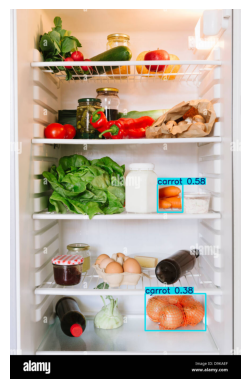

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# 1. Charger ton modèle entraîné
model = YOLO('../runs/detect/train6/weights/best.pt') 

# 2. Faire la détection sur une image
# conf=0.25 : on ne garde que les objets dont l'IA est sûre à plus de 25%
results = model.predict(source='../image.png', conf=0.30, device=0)

# 3. Afficher le résultat visuel
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()